In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb as n_choose_k

In [9]:
#define the Necessary functions
#takes in i as an iterable, n as an interable, and t as a indepedent variable.
'''The Bernstein basis polynomials are the most efficient way to create recursive Bezier coefficients.
    Here I wil use the same definition as wikipedia, with binomial coefficients given by scipy.special.comb.'''
def BernsteinPoly(i,n,t):
    return n_choose_k(n,i) * (t**i) * (1-t)**(n-i)


'''Here I will take in a function step size (a value that will lead to a plotting precision).
    I will also take in an array of control points. The control points are chosen manually and are what 
    define the number of Bezier coefficients.
    
    The sum of Bernstein basis polynomials times each control point yields one Bezier Coefficient.
    This can be computed efficiently using np.dot. Thus, in this case we have n = 'size' 'Bezier Coefficients.'''
def BezierCoeff(funcstepsize,controlpoints):
    size = int(1.0/funcstepsize)                     #conversion into an integer value of length
    coeffs = []
    cplength = len(controlpoints)                   
    tvals = np.linspace(0,1.0,size)                  #the 'time' values of the Bernstein Polynomials
    for i in range(cplength):
        coeff = BernsteinPoly(i,cplength-1,tvals)    #getting the Bernstein Polynomial for each control point
        coeffs.append(coeff)                        
    xpoints = controlpoints[:,0]                     #splitting the input array into x and y points
    ypoints = controlpoints[:,1]
    
    xbezier = np.dot(xpoints,coeffs)                #multiplying each control point by Bernstein polynomials
    ybezier = np.dot(ypoints,coeffs)
    
    return xbezier,ybezier

def Degree90Corner(xwidth,ywidth,xlength,ylength,carwidth,fstepsize):
    
    nonbasicx = (xwidth-(2*carwidth))
    nonbasicy = (ylength+(2*carwidth))
    
    nbpoint1 = [nonbasicx,ylength]
    nbpoint2 = [nonbasicx,nonbasicy]
    nbpoint3 = [xwidth,nonbasicy]
    
    bpoint1 = [0,0]
    bpoint2 = [xwidth,ylength]
    bpoint3 = [xwidth+xlength,ywidth+ylength]
    
    apex = (xwidth,ylength)
    
    controlpoints = np.array([bpoint1,nbpoint1,bpoint2,nbpoint2,nbpoint3,bpoint3])
    
    xb,yb = BezierCoeff(fstepsize,controlpoints)
    
    return xb,yb,controlpoints,apex
# def plotBezier(xb,yb,controlpoints):
    
    
    
#     fig,ax = plt.subplots(figsize = (10,8))
#     ax.plot(x,y,linewidth = 4)
#     ax.plot(2.0,6.0,'r.',markersize = 20)
#     ax.axhline(6,c = 'k')
#     ax.axhline(7.5,c = 'k')
#     ax.axvline(0,c = 'k')
#     ax.axvline(2,c = 'k')
#     ax.plot(points[:,0],points[:,1],'g.',markersize = 10)




#now I need to evaluate each coefficient at a 'large' number of 'time' points. Then, evaluate at each control point.
#this requires two for loops. 

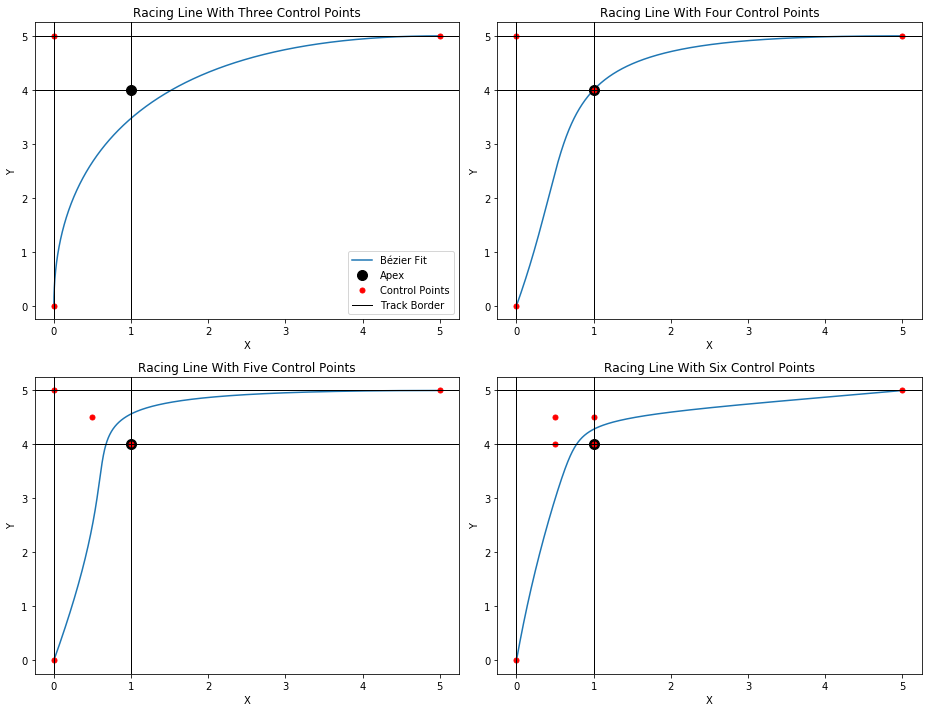

In [5]:
fig = plt.figure(figsize = (13,10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

points1 = np.array([[0.0,0.0],[0.0,5.0],[5.0,5.0]])
bez1 = BezierCoeff(.001,points1)
ax1.plot(bez1[0],bez1[1],label = 'Bézier Fit')
ax1.plot(1.0,4.0,'k.',markersize = 20,label = 'Apex')
ax1.plot(points1[:,0],points1[:,1],'r.',markersize = 10,label = 'Control Points')
ax1.axhline(4,c = 'k',linewidth = 1,label = 'Track Border')
ax1.axhline(5,c = 'k',linewidth = 1)
ax1.axvline(0,c = 'k',linewidth = 1)
ax1.axvline(1,c = 'k',linewidth = 1)
ax1.set_title('Racing Line With Three Control Points')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()

points1 = np.array([[0.0,0.0],[1.0,4.0],[0.0,5.0],[5.0,5.0]])
bez1 = BezierCoeff(.001,points1)
ax2.plot(bez1[0],bez1[1],label = 'Bézier Fit')
ax2.plot(1.0,4.0,'k.',markersize = 20,label = 'Apex')
ax2.plot(points1[:,0],points1[:,1],'r.',markersize = 10,label = 'Control Points')
ax2.axhline(4,c = 'k',linewidth = 1,label = 'Track Border')
ax2.axhline(5,c = 'k',linewidth = 1)
ax2.axvline(0,c = 'k',linewidth = 1)
ax2.axvline(1,c = 'k',linewidth = 1)
ax2.set_title('Racing Line With Four Control Points')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
#ax2.legend()

points1 = np.array([[0.0,0.0],[1.0,4.0],[0.5,4.5],[0.0,5.0],[5.0,5.0]])
bez1 = BezierCoeff(.001,points1)
ax3.plot(bez1[0],bez1[1],label = 'Bézier Fit')
ax3.plot(1.0,4.0,'k.',markersize = 20,label = 'Apex')
ax3.plot(points1[:,0],points1[:,1],'r.',markersize = 10,label = 'Control Points')
ax3.axhline(4,c = 'k',linewidth = 1,label = 'Track Border')
ax3.axhline(5,c = 'k',linewidth = 1)
ax3.axvline(0,c = 'k',linewidth = 1)
ax3.axvline(1,c = 'k',linewidth = 1)
ax3.set_title('Racing Line With Five Control Points')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
#ax3.legend()

points1 = np.array([[0.0,0.0],[0.5,4.0],[1.0,4.0],[0.5,4.5],[1.0,4.5],[5.0,5.0]])
bez1 = BezierCoeff(.001,points1)
ax4.plot(bez1[0],bez1[1],label = 'Bézier Fit')
ax4.plot(1.0,4.0,'k.',markersize = 20,label = 'Apex')
ax4.plot(points1[:,0],points1[:,1],'r.',markersize = 10,label = 'Control Points')
ax4.axhline(4,c = 'k',linewidth = 1,label = 'Track Border')
ax4.axhline(5,c = 'k',linewidth = 1)
ax4.axvline(0,c = 'k',linewidth = 1)
ax4.axvline(1,c = 'k',linewidth = 1)
ax4.set_title('Racing Line With Six Control Points')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
#ax3.legend()

plt.tight_layout()
plt.savefig('RacingLineNpoints.pdf')


1000


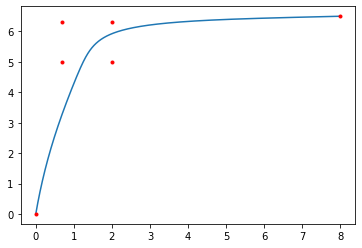

In [46]:
x,y,c,a = Degree90Corner(2,1.5,6,5,0.66,.001)
plt.plot(x,y)
plt.plot(c[:,0],c[:,1],'r.')
print(len(x))

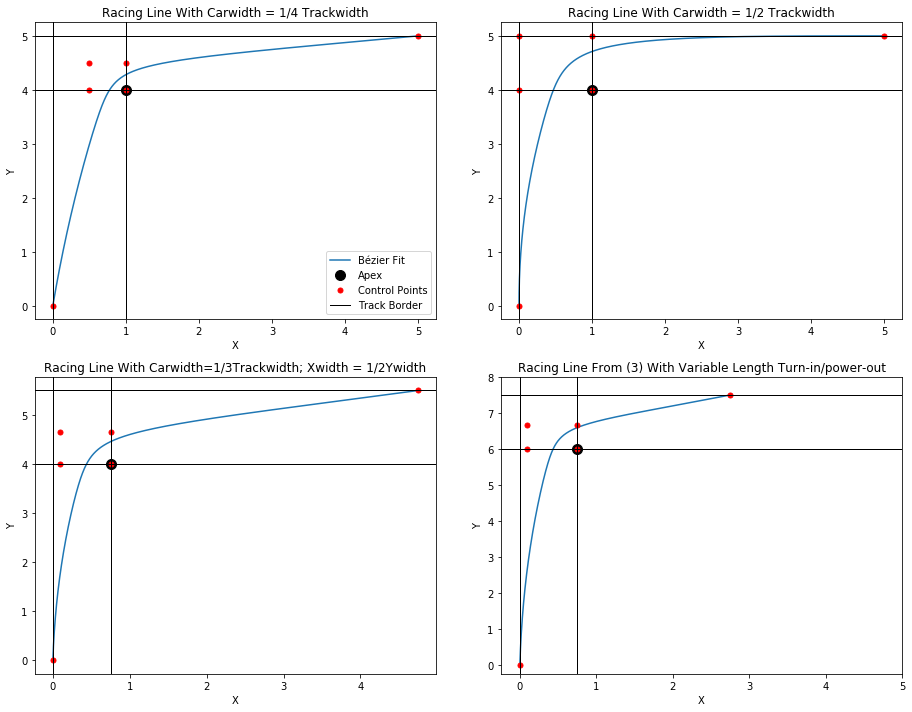

In [68]:
fig = plt.figure(figsize = (13,10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

x1,y1,c1,a1 = Degree90Corner(1,1,4,4,0.25,.001)
ax1.plot(x1,y1,label = 'Bézier Fit')
ax1.plot(a1[0],a1[1],'k.',markersize = 20,label = 'Apex')
ax1.plot(c1[:,0],c1[:,1],'r.',markersize = 10,label = 'Control Points')
ax1.axhline(4,c = 'k',linewidth = 1,label = 'Track Border')
ax1.axhline(5,c = 'k',linewidth = 1)
ax1.axvline(0,c = 'k',linewidth = 1)
ax1.axvline(1,c = 'k',linewidth = 1)
ax1.set_title('Racing Line With Carwidth = 1/4 Trackwidth')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()

x2,y2,c2,a2 = Degree90Corner(1,1,4,4,0.5,.001)
ax2.plot(x2,y2,label = 'Bézier Fit')
ax2.plot(a2[0],a2[1],'k.',markersize = 20,label = 'Apex')
ax2.plot(c2[:,0],c2[:,1],'r.',markersize = 10,label = 'Control Points')
ax2.axhline(4,c = 'k',linewidth = 1,label = 'Track Border')
ax2.axhline(5,c = 'k',linewidth = 1)
ax2.axvline(0,c = 'k',linewidth = 1)
ax2.axvline(1,c = 'k',linewidth = 1)
ax2.set_title('Racing Line With Carwidth = 1/2 Trackwidth')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
#ax2.legend()

x3,y3,c3,a3 = Degree90Corner(0.75,1.5,4,4,0.33,.001)
ax3.plot(x3,y3,label = 'Bézier Fit')
ax3.plot(a3[0],a3[1],'k.',markersize = 20,label = 'Apex')
ax3.plot(c3[:,0],c3[:,1],'r.',markersize = 10,label = 'Control Points')
ax3.axhline(4,c = 'k',linewidth = 1,label = 'Track Border')
ax3.axhline(5.5,c = 'k',linewidth = 1)
ax3.axvline(0,c = 'k',linewidth = 1)
ax3.axvline(0.75,c = 'k',linewidth = 1)
ax3.set_title('Racing Line With Carwidth=1/3Trackwidth; Xwidth = 1/2Ywidth')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
#ax3.legend()

x4,y4,c4,a4 = Degree90Corner(0.75,1.5,2,6,0.33,.001)
ax4.plot(x4,y4,label = 'Bézier Fit')
ax4.plot(a4[0],a4[1],'k.',markersize = 20,label = 'Apex')
ax4.plot(c4[:,0],c4[:,1],'r.',markersize = 10,label = 'Control Points')
ax4.axhline(6,c = 'k',linewidth = 1,label = 'Track Border')
ax4.axhline(7.5,c = 'k',linewidth = 1)
ax4.axvline(0,c = 'k',linewidth = 1)
ax4.axvline(0.75,c = 'k',linewidth = 1)
ax4.set_title('Racing Line From (3) With Variable Length Turn-in/power-out')
ax4.axis([-0.25,5,-0.25,8])
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
#ax3.legend()

plt.tight_layout()
plt.savefig('RacingLineParampoints.pdf')

In [132]:
def bernstein_poly(i, n, t):
    """
     The Bernstein polynomial of n, i as a function of t
    """

    return n_choose_k(n, i) * ( t**(n-i) ) * (1 - t)**i


def bezier_curve(points, nTimes=1000):
    """
       Given a set of control points, return the
       bezier curve defined by the control points.

       points should be a list of lists, or list of tuples
       such as [ [1,1], 
                 [2,3], 
                 [4,5], ..[Xn, Yn] ]
        nTimes is the number of time steps, defaults to 1000

        See http://processingjs.nihongoresources.com/bezierinfo/
    """

    nPoints = len(points)
    xPoints = np.array([p[0] for p in points])
    yPoints = np.array([p[1] for p in points])

    t = np.linspace(0.0, 1.0, nTimes)

    polynomial_array = np.array([ bernstein_poly(i, nPoints-1, t) for i in range(0, nPoints)   ])
    #print(np.size(polynomial_array))
    xvals = np.dot(xPoints, polynomial_array)
    yvals = np.dot(yPoints, polynomial_array)

    return xvals, yvals

    


In [42]:
points  = np.array([[0.0,-1.0,],[2.0,9.0],[4.0,14.0]])

In [43]:
z = bezier_curve(points,nTimes = 1000)

3000


3000


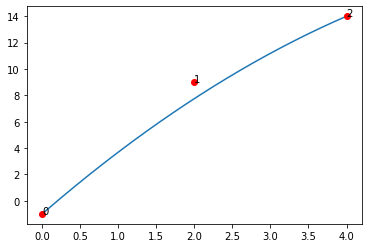

In [44]:

    xpoints = [p[0] for p in points]
    ypoints = [p[1] for p in points]
    
    xvals, yvals = bezier_curve(points, nTimes=1000)
    plt.plot(xvals, yvals)
    plt.plot(xpoints, ypoints, "ro")
    for nr in range(len(points)):
        plt.text(points[nr][0], points[nr][1], nr)
    
    plt.show()

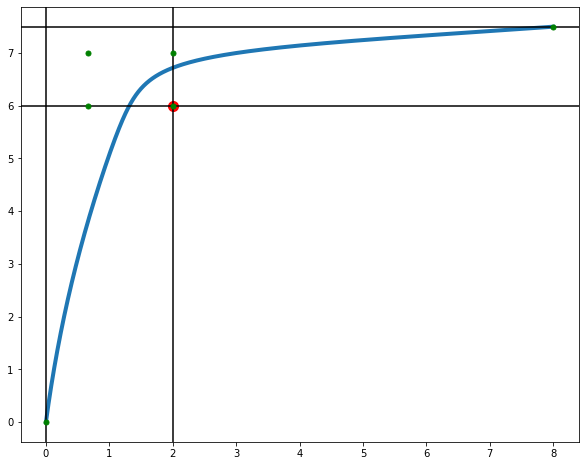

In [134]:
points  = np.array([[0.0,0.0],[0.67,6.0],[2.0,6.0],[.67,7.0],[2.0,7.0],[8,7.5]])
x,y = BezierCoeff(.001,points)
fig,ax = plt.subplots(figsize = (10,8))
ax.plot(x,y,linewidth = 4)
ax.plot(2.0,6.0,'r.',markersize = 20)
ax.axhline(6,c = 'k')
ax.axhline(7.5,c = 'k')
ax.axvline(0,c = 'k')
ax.axvline(2,c = 'k')
ax.plot(points[:,0],points[:,1],'g.',markersize = 10)

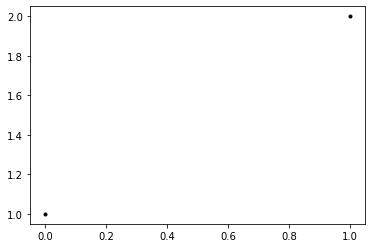

In [30]:
a1 = [1,2]

plt.plot(a1,'k.')

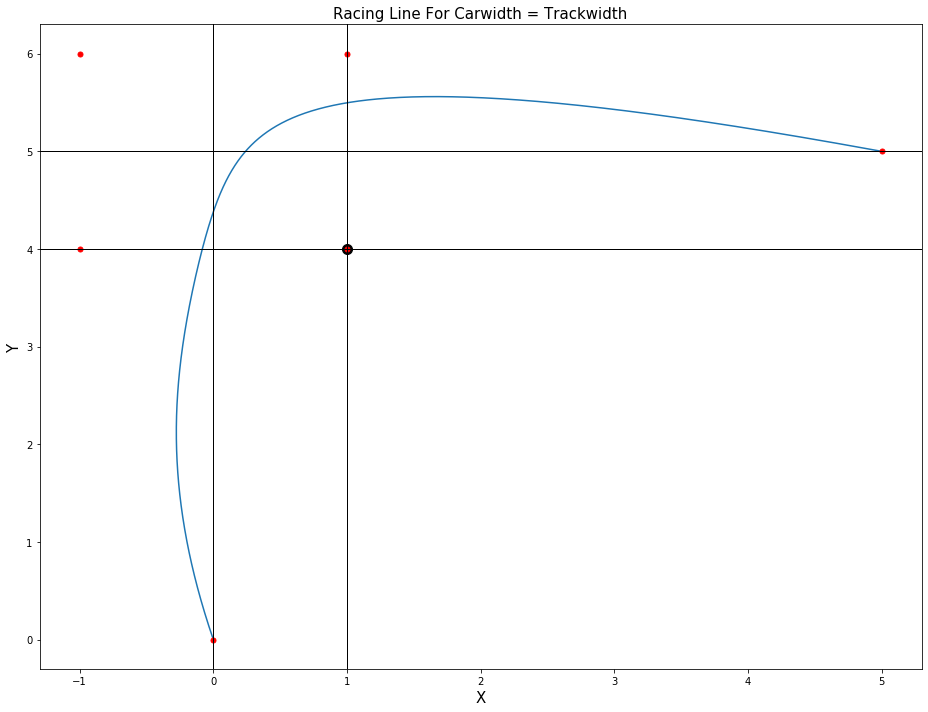

In [75]:
fig = plt.figure(figsize = (13,10))
ax5 = plt.subplot(111)
x5,y5,c5,a5 = Degree90Corner(1.0,1.0,4,4,1.0,.001)
ax5.plot(x5,y5,label = 'Bézier Fit')
ax5.plot(a5[0],a5[1],'k.',markersize = 20,label = 'Apex')
ax5.plot(c5[:,0],c5[:,1],'r.',markersize = 10,label = 'Control Points')
ax5.axhline(4,c = 'k',linewidth = 1,label = 'Track Border')
ax5.axhline(5,c = 'k',linewidth = 1)
ax5.axvline(0,c = 'k',linewidth = 1)
ax5.axvline(1.0,c = 'k',linewidth = 1)
ax5.set_title('Racing Line For Carwidth = Trackwidth',size = 15)

ax5.set_xlabel('X',size = 15)
ax5.set_ylabel('Y',size = 15)
#a3.legend()

plt.tight_layout()
plt.savefig('RacingLineWideCar.pdf')